In [ ]:
!pip install keras

In [ ]:
from keras.datasets import mnist

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
(X_train,y_train),(X_test,y_test)= mnist.load_data() 

In [ ]:
X_train.shape 

(60000, 28, 28)

Text(0.5, 1.0, '5')

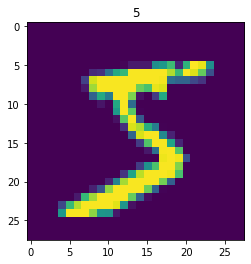

In [ ]:
plt.imshow(X_train[0])
plt.title(y_train[0])

Text(0.5, 1.0, '9')

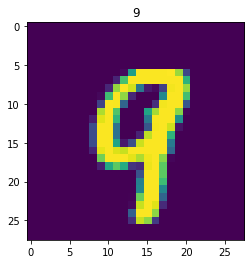

In [ ]:
plt.imshow(X_train[800])
plt.title(y_train[800])

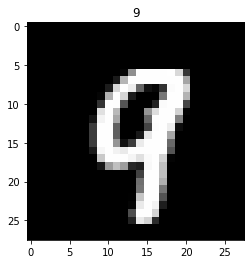

In [ ]:
plt.imshow(X_train[800],cmap='gray')
plt.title(y_train[800])
plt.show()

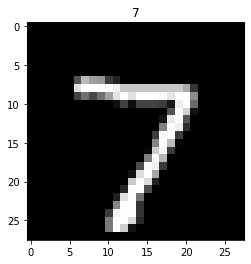

In [ ]:
plt.imshow(X_test[0],cmap='gray')
plt.title(y_test[0])
plt.show()

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [ ]:
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten  
from keras.models import Sequential

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters= 4,kernel_size=(5,5),activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(filters= 4,kernel_size=(7,7),activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))    

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['acc']  )

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 4)         104       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 4)           788       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 3, 3, 4)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                370       
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
____________________________________________________

In [ ]:
model.fit(X_train,y_train,epochs=1,batch_size=1)

60000/60000 [==============================] - 106s 2ms/step - loss: 0.7431 - acc: 0.7887


In [ ]:
test=X_test[0].reshape(-1,28,28,1)
test.shape

(1, 28, 28, 1)

In [ ]:
model.predict_classes(test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

In [ ]:
model.save("./model.h5")